In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import operator
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode()

In [4]:
df = pd.read_csv("FacebookCompanyStock.csv")

In [5]:
data_2018 = df.loc[df['year'] == 2018] 

In [6]:
data_2018_3 = data_2018.loc[data_2018["month"] == 3]

In [7]:
check = df.loc[df["year"] > 2014]
check = check.sort_values(by='year', ascending=True)
check = check[['open', 'high', "low", "close", "year"]]

### LSTM

In [8]:
def training_lstm(x, actual_x_test, previous_steps, iterations, values):    
    x_train = []
    y_train = []
    for i in range(len(x)):
        g = i + previous_steps
        if g > len(x)-1:
            break
        x_train.append(x[i:g])
        y_train.append(x[g])
    x_train = np.array(x_train)
    x_train = np.array(x_train)

    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1) #data reshaping of LSTM first Layer
    
    print (x_train.shape)
    y_train = np.array(y_train)
    pred = model.fit(x_train,y_train, epochs = iterations)

    train = model.predict(x_train)
    sh = train.shape
    sh2 = sh[0]
    scorer2_train = r2_score(x[:sh2], train)
    #from matplotlib.pyplot import figure
    #figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(x, label='Actual')
    plt.plot(train, label='Predict')
    plt.xlabel('Number of Days')
    plt.ylabel('Stock Prices')
    
    plt.legend()
    plt.title("Comparison on the Training set (ADI)")
    plt.show()

    #this is the testing part                                                    
    x_test = []
    for i in range(len(actual_x_test)):
        g = i + previous_steps
        if g > len(actual_x_test):
            break
        x_test.append(actual_x_test[i:g])

    x_test1 = np.array(x_test)
    x_test = x_test1.reshape(x_test1.shape[0], x_test1.shape[1], 1)
    predicted_x_test = model.predict(x_test)
    #print (predicted_x_test, x_test1)
    
    
    sh = predicted_x_test.shape
    sh2 = sh[0]
    scorer2 = r2_score(actual_x_test[:sh2], predicted_x_test)
    
    #from matplotlib.pyplot import figure
    #figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(actual_x_test, label = "Actual")
    #print (actual_x_test[:444])
    plt.plot(predicted_x_test, label = "Predicted")
    plt.xlabel('Number of Days')
    plt.ylabel('Stock Prices')
    plt.legend()
    plt.title("Comparison on the test set (ADI)")
    plt.show()
    
    #actual_x_test = df1[2864:3124] 
    #actual_x_test = actual_x_test["Open"].values
    for i in range(values):    
        test = actual_x_test[-previous_steps:]
        test1 = test.reshape(1,previous_steps,1)
        new = np.append(actual_x_test, model.predict(test1))
        actual_x_test = new
    vals = new[-values:]
    plt.plot(vals, color = "orange", label = "Predicted")
    plt.xlabel("Number of days")
    plt.ylabel("Stock prices")
    plt.title("Trending line for future number of days " + str(values) +" (ADI)")
    plt.show()
    print ("R2 for training:", scorer2_train)
    print ("R2 for test:", scorer2)

In [13]:
ps = 5 #PREVIOUS STEPS CAN BE CHANGED FROM HERE
model = Sequential()
model.add(LSTM(20, activation = "relu", input_shape=(ps, 1))) #defing LSTM layer
model.add(Dense(1))
model.compile(optimizer= "adam", loss = "mse")

### AMAZON AND CISCO 2012 - 2019 (scaled)

(1506, 5, 1)
Epoch 1/100
1506/1506 [==============================] - 1s 400us/step - loss: 0.7793
Epoch 2/100
1506/1506 [==============================] - 0s 131us/step - loss: 0.2155
Epoch 3/100
1506/1506 [==============================] - 0s 124us/step - loss: 0.0162
Epoch 4/100
1506/1506 [==============================] - 0s 121us/step - loss: 0.0117
Epoch 5/100
1506/1506 [==============================] - 0s 121us/step - loss: 0.0109
Epoch 6/100
1506/1506 [==============================] - 0s 124us/step - loss: 0.0113
Epoch 7/100
1506/1506 [==============================] - 0s 120us/step - loss: 0.0095
Epoch 8/100
1506/1506 [==============================] - 0s 119us/step - loss: 0.0090
Epoch 9/100
1506/1506 [==============================] - 0s 122us/step - loss: 0.0089
Epoch 10/100
1506/1506 [==============================] - 0s 131us/step - loss: 0.0085
Epoch 11/100
1506/1506 [==============================] - 0s 124us/step - loss: 0.0082
Epoch 12/100
1506/1506 [===============

1506/1506 [==============================] - 0s 136us/step - loss: 0.0045
Epoch 96/100
1506/1506 [==============================] - 0s 127us/step - loss: 0.0046
Epoch 97/100
1506/1506 [==============================] - 0s 130us/step - loss: 0.0046
Epoch 98/100
1506/1506 [==============================] - 0s 172us/step - loss: 0.0044
Epoch 99/100
1506/1506 [==============================] - 0s 160us/step - loss: 0.0044
Epoch 100/100
1506/1506 [==============================] - 0s 130us/step - loss: 0.0045


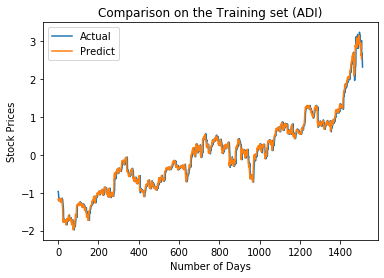

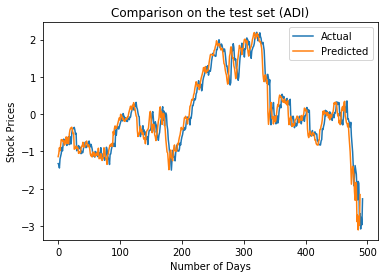

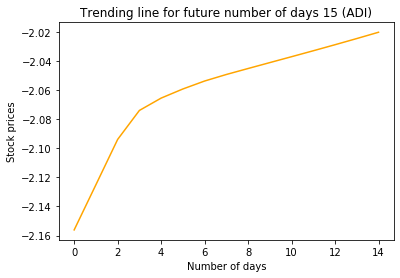

R2 for training: 0.9850218372299204
R2 for test: 0.8916063702870243


In [14]:
amazon = pd.read_csv("amazon.csv")
amazon_co = pd.read_csv("cisco.csv")
train = amazon_co[0:1511] # this is training set from 2012 - 2017
x_train= train["Open"].values
test = amazon_co[1511:]
x_test = test["Open"].values # this is test data from 2017 - 2019
X_scaled_train = preprocessing.scale(x_train)
X_scaled_test = preprocessing.scale(x_test)
training_lstm(X_scaled_train,X_scaled_test, previous_steps = ps, iterations = 100, values = 15)

### AMAZON AND CISCO 2012 - 2019 

Epoch 1/100
1481/1481 [==============================] - 1s 824us/step - loss: 76.0720
Epoch 2/100
1481/1481 [==============================] - 1s 514us/step - loss: 0.5367
Epoch 3/100
1481/1481 [==============================] - 1s 570us/step - loss: 0.3488
Epoch 4/100
1481/1481 [==============================] - 1s 491us/step - loss: 0.3092
Epoch 5/100
1481/1481 [==============================] - 1s 480us/step - loss: 0.3175
Epoch 6/100
1481/1481 [==============================] - 1s 520us/step - loss: 0.2614
Epoch 7/100
1481/1481 [==============================] - 1s 495us/step - loss: 0.3014
Epoch 8/100
1481/1481 [==============================] - 1s 523us/step - loss: 0.2743
Epoch 9/100
1481/1481 [==============================] - 1s 520us/step - loss: 0.2712
Epoch 10/100
1481/1481 [==============================] - 1s 538us/step - loss: 0.2508
Epoch 11/100
1481/1481 [==============================] - 1s 539us/step - loss: 0.2657
Epoch 12/100
1481/1481 [===========================

1481/1481 [==============================] - 1s 531us/step - loss: 0.1803
Epoch 96/100
1481/1481 [==============================] - 1s 564us/step - loss: 0.1774
Epoch 97/100
1481/1481 [==============================] - 1s 592us/step - loss: 0.1708
Epoch 98/100
1481/1481 [==============================] - 1s 613us/step - loss: 0.1918
Epoch 99/100
1481/1481 [==============================] - 1s 659us/step - loss: 0.2057
Epoch 100/100
1481/1481 [==============================] - 1s 638us/step - loss: 0.1741


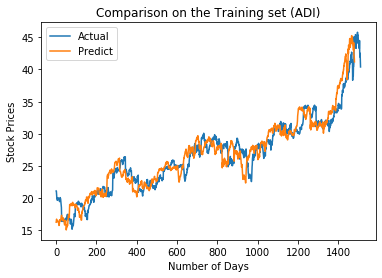

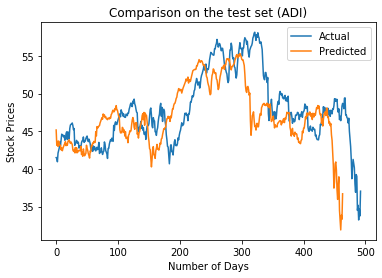

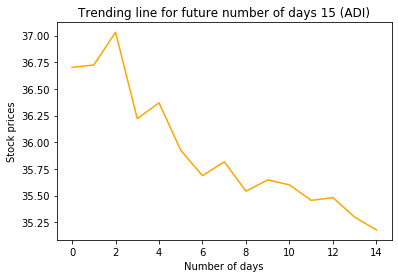

R2 for training: 0.8821492809810313
R2 for test: 0.08887741885913447


In [322]:
amazon = pd.read_csv("amazon.csv")
amazon_co = pd.read_csv("cisco.csv")

train = amazon_co[0:1511] # this is training set from 2012 - 2017
x_train= train["Open"].values
test = amazon_co[1511:]
x_test = test["Open"].values # this is test data from 2017 - 2019
training_lstm(x_train,x_test, previous_steps = ps, iterations = 100, values = 15)

### FACEBOOK AND ACCEL 2012 - 2019

Epoch 1/100
1405/1405 [==============================] - 1s 561us/step - loss: 17.6332
Epoch 2/100
1405/1405 [==============================] - 0s 219us/step - loss: 0.2747
Epoch 3/100
1405/1405 [==============================] - 0s 210us/step - loss: 0.2160
Epoch 4/100
1405/1405 [==============================] - 0s 230us/step - loss: 0.2118
Epoch 5/100
1405/1405 [==============================] - 0s 281us/step - loss: 0.2036
Epoch 6/100
1405/1405 [==============================] - 0s 255us/step - loss: 0.2030
Epoch 7/100
1405/1405 [==============================] - 0s 257us/step - loss: 0.2036
Epoch 8/100
1405/1405 [==============================] - 0s 219us/step - loss: 0.1979
Epoch 9/100
1405/1405 [==============================] - 0s 256us/step - loss: 0.1935
Epoch 10/100
1405/1405 [==============================] - 0s 220us/step - loss: 0.1823
Epoch 11/100
1405/1405 [==============================] - 0s 236us/step - loss: 0.1763
Epoch 12/100
1405/1405 [===========================

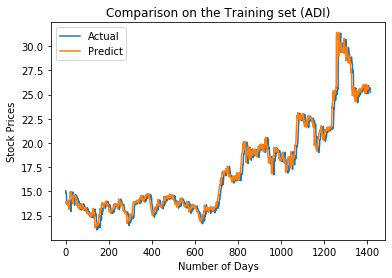

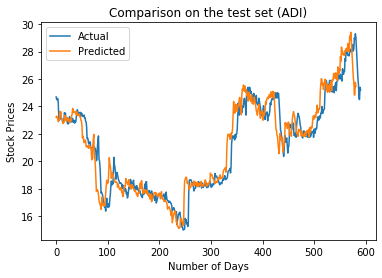

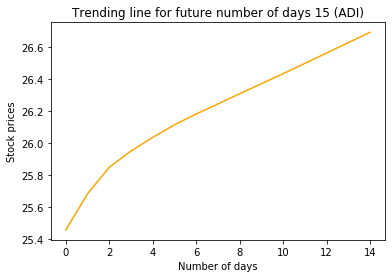

R2 for training: 0.9643521694455774
R2 for test: 0.882685104747343


In [343]:
facebook = pd.read_csv("facebook.csv")
facebook_co = pd.read_csv("accel.csv")

train = facebook_co[0:1415] # this is training set from 2012 - 2017
x_train= train["Open"].values
test = facebook_co[1415:]
x_test = test["Open"].values # this is test data from 2017 - 2019
training_lstm(x_train,x_test, previous_steps = ps, iterations = 100, values = 15)

### APPLE AND ADI 2012-2019

Epoch 1/100
1502/1502 [==============================] - 1s 391us/step - loss: 9480.2314
Epoch 2/100
1502/1502 [==============================] - 0s 126us/step - loss: 370.1839
Epoch 3/100
1502/1502 [==============================] - 0s 126us/step - loss: 3.5053
Epoch 4/100
1502/1502 [==============================] - 0s 126us/step - loss: 3.4195
Epoch 5/100
1502/1502 [==============================] - 0s 165us/step - loss: 3.3177
Epoch 6/100
1502/1502 [==============================] - 0s 138us/step - loss: 3.3310
Epoch 7/100
1502/1502 [==============================] - 0s 155us/step - loss: 3.2583
Epoch 8/100
1502/1502 [==============================] - 0s 133us/step - loss: 3.2475
Epoch 9/100
1502/1502 [==============================] - 0s 159us/step - loss: 3.2066
Epoch 10/100
1502/1502 [==============================] - 0s 137us/step - loss: 3.2693
Epoch 11/100
1502/1502 [==============================] - 0s 140us/step - loss: 3.1859
Epoch 12/100
1502/1502 [=======================

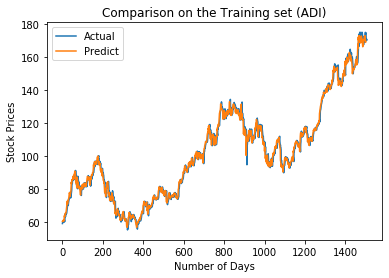

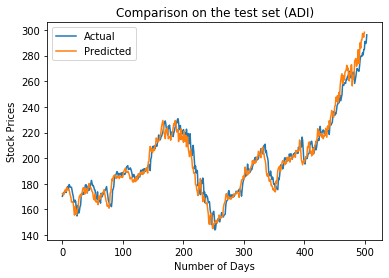

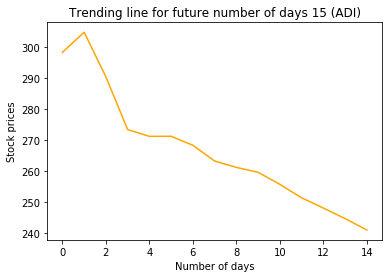

R2 for training: 0.9903708634485162
R2 for test: 0.9465844681924354


In [351]:
apple = pd.read_csv("apple.csv")
apple_co = pd.read_csv("adi.csv")

train = apple_co[3022:4529] # this is training set from 2012 - 2017
x_train= train["Open"].values
test = apple_co[4529:5033]
x_test = test["Open"].values # this is test data from 2017 - 2019
training_lstm(x_train,x_test, previous_steps = ps, iterations = 100, values = 15)

### POLYNOMIAL REGRESSION (MACHINE LEARNING)

In [10]:
amazon = pd.read_csv("amazon.csv")
amazon_co = pd.read_csv("cisco.csv")
train, test = train_test_split(amazon, test_size=0.20)
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Open']
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Open']

Mean Absolute Error: 75.20799863641602
0.9706141350249963


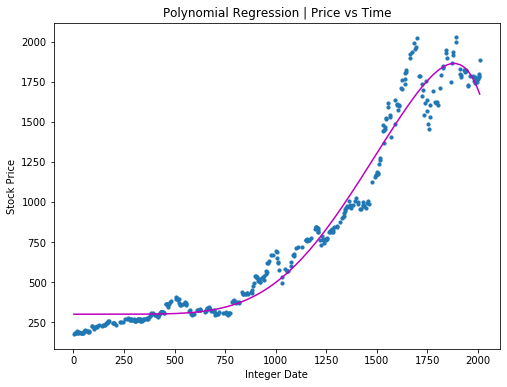

In [12]:
import sklearn.metrics as metrics
polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_poly_pred))  

#rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
r2 = r2_score(y_test,y_poly_pred)
#print(rmse)
print(r2)
plt.figure(1, figsize=(8,6))

plt.scatter(X_test, y_test , s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.xlabel('Integer Date')
plt.title('Polynomial Regression | Price vs Time')
plt.ylabel('Stock Price')
plt.show()
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_poly_pred))  
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_poly_pred))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_poly_pred)))
#print('slope:', model.coef_)
# The Intercept
#print('Intercept: ', model.intercept_)

### Training Data

Slope:  0.9359699157310176
Intercept:  -136.97781135758066


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning:

np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead



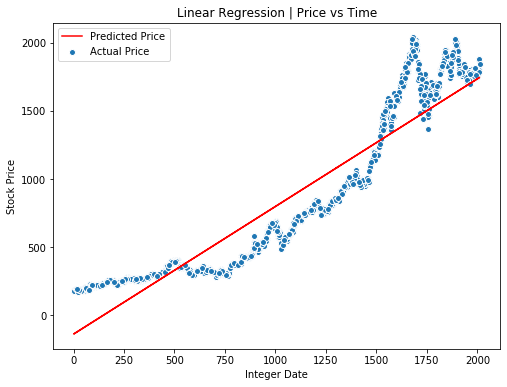

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(amazon, test_size=0.20)
from sklearn.linear_model import LinearRegression
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Open']
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)
# Train set graph
plt.figure(1, figsize=(8,6))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [396]:
from sklearn.model_selection import train_test_split

import operator
train, test = train_test_split(amazon, test_size=0.20)
from sklearn.linear_model import LinearRegression
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Open']

X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Open']


In [397]:
# evaluation for test set
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Open']
y_pred = model.predict(X_test)
X_test.shape

(403, 1)

### Test data

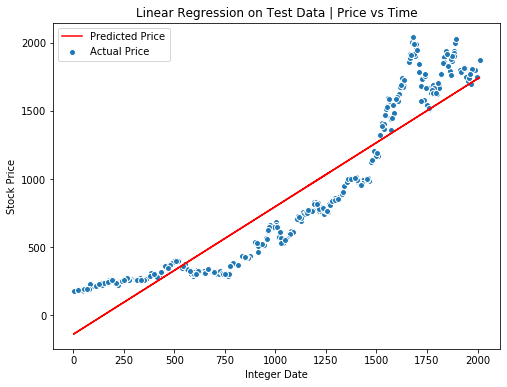

In [398]:
plt.figure(1, figsize=(8,6))
plt.title('Linear Regression on Test Data | Price vs Time')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [400]:
from sklearn import metrics
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 194.17138463048366
Mean Squared Error: 47583.74453130601
Root Mean Squared Error: 218.13698570234715
R2:  0.8649013187944055


In [421]:
import plotly.figure_factory as ff

df = [
    dict(Task="Result", Start='2020-04-05', Finish='2020-04-15', Complete=15),        
    dict(Task="Implementation", Start='2020-03-25', Finish='2020-04-15', Complete=30),
    dict(Task="Design", Start='2020-04-06', Finish='2020-04-15', Complete=4),
    dict(Task="Design Exploration", Start='2020-03-25', Finish='2020-04-5', Complete=10),
    dict(Task="Data Preprocessing", Start='2020-03-20', Finish='2020-03-25', Complete=15),
    dict(Task="Data cleaning", Start='2020-03-22', Finish='2020-03-30', Complete=5),
    dict(Task="Data Exploration", Start='2020-03-15', Finish='2020-03-25', Complete=12),
    dict(Task="Collection", Start='2020-03-15', Finish='2020-03-20', Complete=10)
     ]

fig = ff.create_gantt(df, colors='Viridis', index_col='Complete', show_colorbar=False, title='Timeline')
fig.show()

In [422]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

labels = ["Introduction","Literature Review","Mathodolgy", "Results", "Conclusion"]

fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Waleed', 'Vatsla'])
fig.add_trace(go.Pie(labels=labels, values=[50, 30, 70,40,50],
                     ), 1, 1)

fig.add_trace(go.Pie(labels=labels, values=[50, 70, 30,50,60],
                     ), 1, 2)
fig.update_layout(title_text='Work Break Down')

fig.show()